<a href="https://colab.research.google.com/github/Kaustubh-Amare/NYC-taxi-trip-time-prediction-ML-regresssion/blob/main/NYC_taxi_trip_prediction_ML_kaustubh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : NYC taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City**


# **BUSINESS CONTEXT**
Our task is to build a model that predicts the total ride duration of taxi trips in New York City. Primary dataset is the one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

This project's main objective is to construct a fundamental machine learning model that can anticipate the normal journey duration for a given pickup location, dropoff location, date, and time. Today, every business has to efficiently leverage its data in order to outperform rivals and provide consumers with better value. Machine learning is increasingly often used to make important business choices, and tools like data prep and sklearn make it simple for anybody to develop models independent of coding ability or domain knowledge. One of the most potent libraries for machine learning is called Scikit Learn.

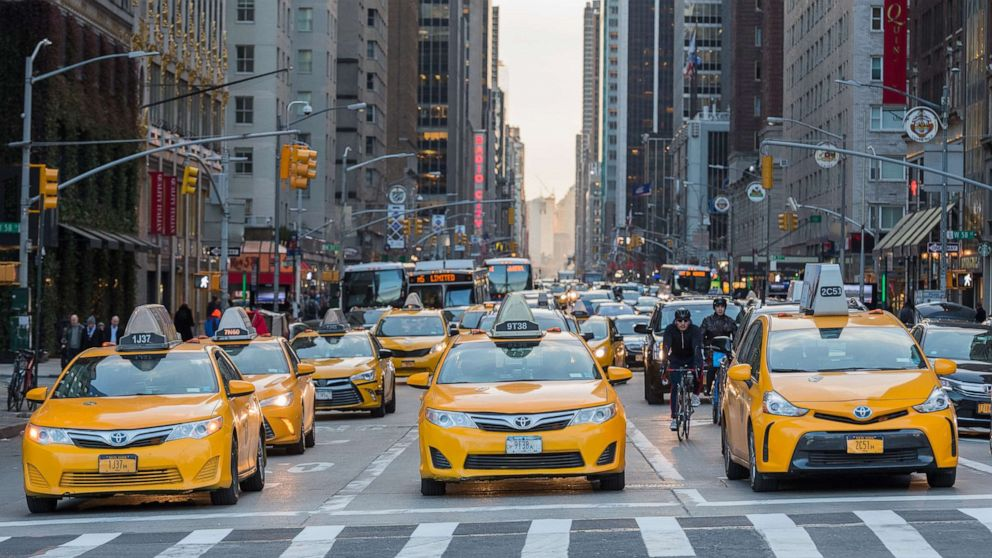

# **Column Details**


*   **Id**: A unique identifier for each trip
*   **Vendor Id**: A unique identifier for each trip

*   **Pickup Datetime**: A unique identifier for each trip
*   **Dropoff Datetime**: A unique identifier for each trip

*   **Passenger Count**: The number of passengers in the vehicle (driver entered value)
*   **Pickup Longitude**: The number of passengers in the vehicle (driver entered value)

*   **Pickup Latitude**: The latitude where the meter was engaged
*   **Dropoff Longitude**: The longitude where the meter was disengaged

*   **Dropoff Latitude**: The latitude where the meter was disengaged

*   **Store and Fwd Flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
*   **Trip Duration**: Duration of time in seconds


>Let's Gooo....

## Step 1- Importing libraries




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import datetime as dt
! pip install klib 
import klib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

import warnings 
warnings.filterwarnings("ignore")
print("libraries import succesfully")



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 36.2 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
libraries import succesfully


## Step 2 :- Import  and overview Data set




In [2]:
path = '/content/drive/MyDrive/DATA_SCI_almabetter/drive_data/NYC_Taxi_Data.csv'
df = pd.read_csv(path)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.shape

(1458644, 11)

In [6]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
missing_val_count_by_column = df.isnull().sum()/len(df)

In [8]:
missing_val_count_by_column

id                    0.0
vendor_id             0.0
pickup_datetime       0.0
dropoff_datetime      0.0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag    0.0
trip_duration         0.0
dtype: float64

>Making copy of data set

In [9]:
wkdf= df.copy() # working df

In [10]:
wkdf.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [11]:
# Defining a function
def complete_info():
    null = pd.DataFrame(index=wkdf.columns)
    null['data_type'] = wkdf.dtypes
    null['null_count'] = wkdf.isnull().sum()
    null['unique_count'] = wkdf.nunique()
    return null

In [12]:
complete_info()

,data_type,null_count,unique_count
id,object,0,1458644
vendor_id,int64,0,2
pickup_datetime,object,0,1380222
dropoff_datetime,object,0,1380377
passenger_count,int64,0,10
pickup_longitude,float64,0,23047
pickup_latitude,float64,0,45245
dropoff_longitude,float64,0,33821
dropoff_latitude,float64,0,62519
store_and_fwd_flag,object,0,2


## Step 3:- Feature engineering


> Proccessing Datetime columns to extract information 

In [13]:
# converting columns from object to date time
wkdf['pickup_datetime'] = pd.to_datetime(wkdf['pickup_datetime'])
wkdf['dropoff_datetime'] = pd.to_datetime(wkdf['dropoff_datetime'])

In [14]:
wkdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


> Extracting pickup month, day of week ,day, hour 

In [15]:
# Extracting info based on pickup_datetime
import calendar
wkdf['pickup_date'] = wkdf[ 'pickup_datetime'].dt.date
wkdf['pickup_day']=wkdf [ 'pickup_datetime'].apply(lambda x:x.day)
wkdf['pickup_hour']=wkdf['pickup_datetime'].apply(lambda x:x.hour)
wkdf['pickup_day_of_week' ]=wkdf['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
wkdf['pickup_DOW_NO']=wkdf['pickup_datetime'].dt.weekday
wkdf['pickup_month']=wkdf [ 'pickup_datetime'].apply(lambda x:x.month)
wkdf['pickup_year']=wkdf['pickup_datetime'].apply(lambda x:x.year)
wkdf.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_DOW_NO,pickup_month,pickup_year
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,14,17,Monday,0,3,2016
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,12,0,Sunday,6,6,2016
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,19,11,Tuesday,1,1,2016
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,6,19,Wednesday,2,4,2016
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,26,13,Saturday,5,3,2016


In [16]:
# Extracting info based on dropoff_datetime
import calendar
wkdf['dropoff_date'] = wkdf[ 'dropoff_datetime'].dt.date
wkdf['dropoff_day']=wkdf [ 'dropoff_datetime'].apply(lambda x:x.day)
wkdf['dropoff_hour']=wkdf['dropoff_datetime'].apply(lambda x:x.hour)
wkdf['dropoff_day_of_week' ]=wkdf['dropoff_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
wkdf['dropoff_DOW_NO']=wkdf['dropoff_datetime'].dt.weekday
wkdf['dropoff_month']=wkdf [ 'dropoff_datetime'].apply(lambda x:x.month)
wkdf['dropoff_year']=wkdf['dropoff_datetime'].apply(lambda x:x.year)
wkdf.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_DOW_NO,pickup_month,pickup_year,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,dropoff_DOW_NO,dropoff_month,dropoff_year
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,3,2016,2016-03-14,14,17,Monday,0,3,2016
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,2016,2016-06-12,12,0,Sunday,6,6,2016
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,2016,2016-01-19,19,12,Tuesday,1,1,2016
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2,4,2016,2016-04-06,6,19,Wednesday,2,4,2016
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,3,2016,2016-03-26,26,13,Saturday,5,3,2016


### Calculating **distance** based on latitude and longitude coordinates provided, using `geodesic` function of geopy

In [17]:
#importing geopy library
from geopy.distance import geodesic

In [18]:
#Creating the function for calculating distance between pickup and dropoff
def distance_cal(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return geodesic(start_coordinates,stop_coordinates).km

In [19]:
#Applying the function to our dataset and creating the feature ‘distance’.
wkdf['distance'] = wkdf.apply(lambda x: distance_cal(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [20]:
wkdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   id                   1458644 non-null  object        
 1   vendor_id            1458644 non-null  int64         
 2   pickup_datetime      1458644 non-null  datetime64[ns]
 3   dropoff_datetime     1458644 non-null  datetime64[ns]
 4   passenger_count      1458644 non-null  int64         
 5   pickup_longitude     1458644 non-null  float64       
 6   pickup_latitude      1458644 non-null  float64       
 7   dropoff_longitude    1458644 non-null  float64       
 8   dropoff_latitude     1458644 non-null  float64       
 9   store_and_fwd_flag   1458644 non-null  object        
 10  trip_duration        1458644 non-null  int64         
 11  pickup_date          1458644 non-null  object        
 12  pickup_day           1458644 non-null  int64         
 1

### One hot encoding :- Converting variables to numbers for regression preparation

In [21]:
wkdf= pd.get_dummies(wkdf, columns=['store_and_fwd_flag'])

In [22]:
wkdf= pd.get_dummies(wkdf, columns=['pickup_day_of_week','dropoff_day_of_week'])

In [23]:
wkdf.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,pickup_day_of_week_Thursday,pickup_day_of_week_Tuesday,pickup_day_of_week_Wednesday,dropoff_day_of_week_Friday,dropoff_day_of_week_Monday,dropoff_day_of_week_Saturday,dropoff_day_of_week_Sunday,dropoff_day_of_week_Thursday,dropoff_day_of_week_Tuesday,dropoff_day_of_week_Wednesday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,...,0,0,0,0,1,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,...,0,0,0,0,0,0,1,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,...,0,1,0,0,0,0,0,0,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,...,0,0,1,0,0,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,...,0,0,0,0,0,1,0,0,0,0


### Calculating `Speed`  in KMPH with respect to calculated distance and trip_duration 

In [24]:
wkdf['Speed']= (wkdf.distance/(wkdf.trip_duration/3600))

In [25]:
wkdf.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,pickup_day_of_week_Tuesday,pickup_day_of_week_Wednesday,dropoff_day_of_week_Friday,dropoff_day_of_week_Monday,dropoff_day_of_week_Saturday,dropoff_day_of_week_Sunday,dropoff_day_of_week_Thursday,dropoff_day_of_week_Tuesday,dropoff_day_of_week_Wednesday,Speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,...,0,0,0,1,0,0,0,0,0,11.885316
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,...,0,0,0,0,0,1,0,0,0,9.820778
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,...,1,0,0,0,0,0,0,1,0,10.813029
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,...,0,1,0,0,0,0,0,0,1,12.450063
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,...,0,0,0,0,1,0,0,0,0,9.823760


In [26]:
wkdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 40 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   id                             1458644 non-null  object        
 1   vendor_id                      1458644 non-null  int64         
 2   pickup_datetime                1458644 non-null  datetime64[ns]
 3   dropoff_datetime               1458644 non-null  datetime64[ns]
 4   passenger_count                1458644 non-null  int64         
 5   pickup_longitude               1458644 non-null  float64       
 6   pickup_latitude                1458644 non-null  float64       
 7   dropoff_longitude              1458644 non-null  float64       
 8   dropoff_latitude               1458644 non-null  float64       
 9   trip_duration                  1458644 non-null  int64         
 10  pickup_date                    1458644 non-null  objec

> Creating copy of Fully equippped data set, and saving for emergencies

In [27]:
NYC_Taxi_time_DFraw = wkdf.copy()       # this Raw df will be untouched and will be called only if needed.
NYC_Taxi_time_DFraw.info()
                                                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 40 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   id                             1458644 non-null  object        
 1   vendor_id                      1458644 non-null  int64         
 2   pickup_datetime                1458644 non-null  datetime64[ns]
 3   dropoff_datetime               1458644 non-null  datetime64[ns]
 4   passenger_count                1458644 non-null  int64         
 5   pickup_longitude               1458644 non-null  float64       
 6   pickup_latitude                1458644 non-null  float64       
 7   dropoff_longitude              1458644 non-null  float64       
 8   dropoff_latitude               1458644 non-null  float64       
 9   trip_duration                  1458644 non-null  int64         
 10  pickup_date                    1458644 non-null  objec

## Step 4:- Processing outliers and checking distributions

> Processing outliers before scalling is neccessary as if not done now, it will contribute while scaling

> Passenger count

In [28]:
# Checking unique passenger count in passenger_columnnusing pandas value_count method

wkdf['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

> there should be no trips with 0 passengers, this 60 entries must be system malfuntion. there are very few trips with 7,8, & 9 passengers. Thus we can drop this row.

In [29]:
wkdf = wkdf[(wkdf['passenger_count'] != 0) & (wkdf['passenger_count'] <= 6)]


>Distance

In [30]:
wkdf['distance'].value_counts()


0.000000     5887
2.064458        2
0.942752        2
0.000644        2
1.289928        2
             ... 
2.817283        1
26.281212       1
2.252518        1
2.133112        1
1.133655        1
Name: distance, Length: 1452682, dtype: int64

There are 5887 entries with trip distance = 0 km, this must be cancelled trips , hence not required.
 

In [31]:
# seperating our data from trip distance = 0.0km

wkdf = wkdf[wkdf['distance'] != wkdf['distance'].min()]

#Removing entries which are having distance less than 50 metere
wkdf = wkdf[wkdf['distance'] > 0.05]

>Duration

In [32]:
wkdf['trip_duration'].sort_values(ascending= False)


978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
287664           2
682599           2
1439166          1
467645           1
269418           1
Name: trip_duration, Length: 1447295, dtype: int64

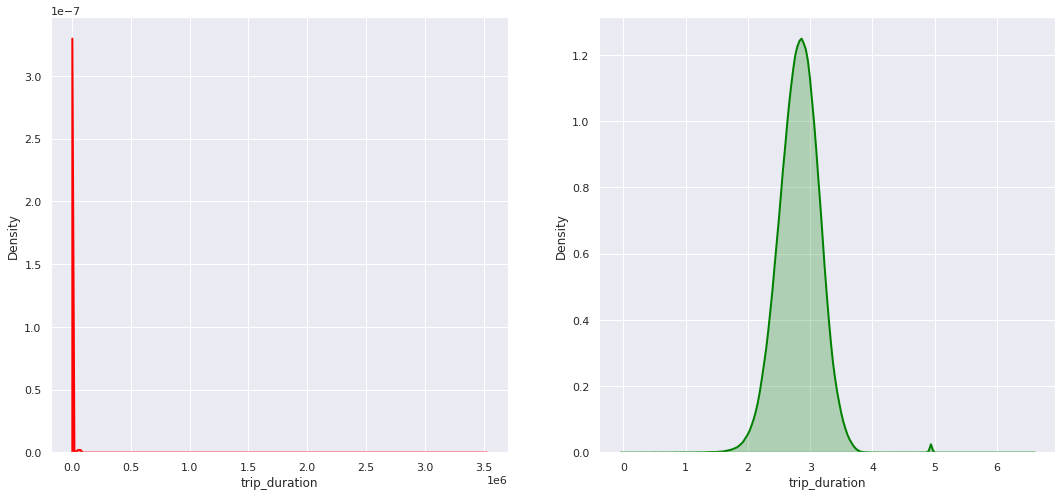

In [33]:
# before outliers removal
fig,ax=plt.subplots(1,2, figsize=(18,8))
sns.distplot(wkdf.trip_duration, hist= False, kde= True, kde_kws= {'shade':True, 'linewidth':2}, label= 'non_normal', color='red', ax=ax[0])
sns.distplot(np.log10(wkdf['trip_duration']), hist= False, kde= True, kde_kws={'shade':True, 'linewidth':2}, label='normal', color='green',ax=ax[1])

* Looks like log transformation is taking care of skewness.

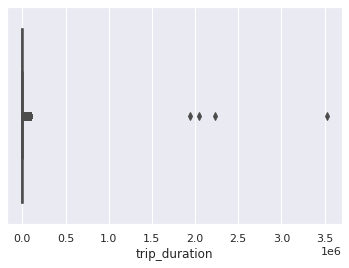

In [34]:
# Box plot for visualizing outliers
sns.boxplot(wkdf['trip_duration'])

In [35]:
#lets see percentile from 0 to 100
for i in range(0,100,10):
  duration= wkdf['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
10 percentile value is 250
20 percentile value is 352
30 percentile value is 449
40 percentile value is 551
50 percentile value is 665
60 percentile value is 800
70 percentile value is 970
80 percentile value is 1211
90 percentile value is 1637
100 percentile value is  3526282


In [36]:
#lets see percentile from 90 to 100 
for i in range(90,100):
  duration= wkdf['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1637
91 percentile value is 1706
92 percentile value is 1783
93 percentile value is 1872
94 percentile value is 1979
95 percentile value is 2108
96 percentile value is 2276
97 percentile value is 2500
98 percentile value is 2833
99 percentile value is 3443
100 percentile value is  3526282


In [37]:
#lets see percentile from 0 to 10 
for i in range(0,10):
  duration= wkdf['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
1 percentile value is 103
2 percentile value is 132
3 percentile value is 154
4 percentile value is 171
5 percentile value is 186
6 percentile value is 200
7 percentile value is 214
8 percentile value is 226
9 percentile value is 238
100 percentile value is  3526282


In [38]:
# Assumimg more time than this as system error or bug
# Trip duration upper limit 
wkdf = wkdf[wkdf.trip_duration <= 3500]      

# Assuming rides smaller than 1 minute as cancelled quickly
# Trip duration lower limit 
wkdf = wkdf[wkdf.trip_duration >= 60]        

In [39]:
wkdf.shape

(1430190, 40)

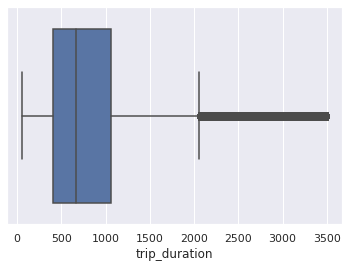

In [40]:
# trip duration box plot after Outliers removal
sns.boxplot(wkdf['trip_duration'])

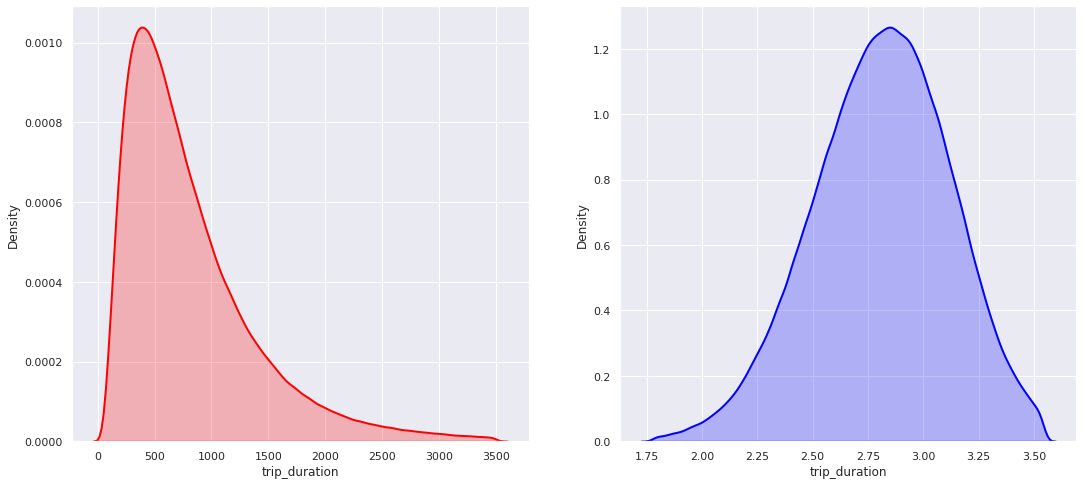

In [41]:
# Distribution After outliers removal
fig,ax=plt.subplots(1,2, figsize=(18,8))
sns.distplot(wkdf.trip_duration, hist= False, kde= True, kde_kws= {'shade':True, 'linewidth':2}, label= 'non_normal', color='red', ax=ax[0])
sns.distplot(np.log10(wkdf['trip_duration']), hist= False, kde= True, kde_kws={'shade':True, 'linewidth':2}, label='normal', color='blue',ax=ax[1])

* As we can see in Left plot after outliers removal, still out data was positively skewed.
* But as we can see in right plot, log is taking care of Skewness of data to good extent.
* Thus, we will use log transformation on our dependent variable in ML. 

>Speed

In [177]:
wkdf['Speed'].sort_values(ascending= False)


910072     6874.214785
184925     5638.682980
974378     5253.665463
377068     4090.789812
1013474    1760.893664
              ...     
80649         0.066255
202836        0.065004
116594        0.063403
1171901       0.060569
1343760       0.059513
Name: Speed, Length: 1430190, dtype: float64

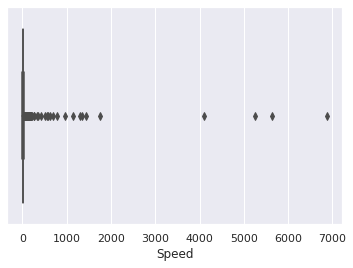

In [178]:
# Speed outliers check
sns.boxplot(wkdf['Speed'])

Maximum speed limosine can sustain in the city like newyork given that roads are empty i.e its late night or early morning is arround 80kmph

*   Still there is speed reading in Thousands (absurd), there is clearly some error or bug in apps calculaion, as its out of mechanical abilities of vehicle 
*   We will limit the data set to 80 kmph (given that NYC is a Busy town) and 5 kmph, as entries out side of this limit will not contribute in ML model much rather contribute in making it less accurate.


In [179]:
wkdf = wkdf[wkdf['Speed']<=80]
wkdf = wkdf[wkdf['Speed']>=5]

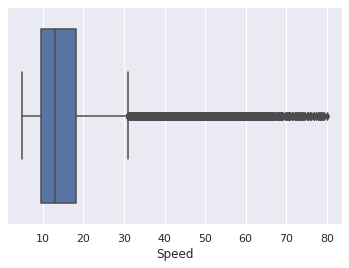

In [180]:
# Speed outliers check after outliers removal
sns.boxplot(wkdf['Speed'])

## Step 5 :- Exploratory data analysis (EDA)

> Pickup and Drop volume w.r.t day of week, i.e Monday= 0, Tuesday=1 and likewise till Sunday= 6

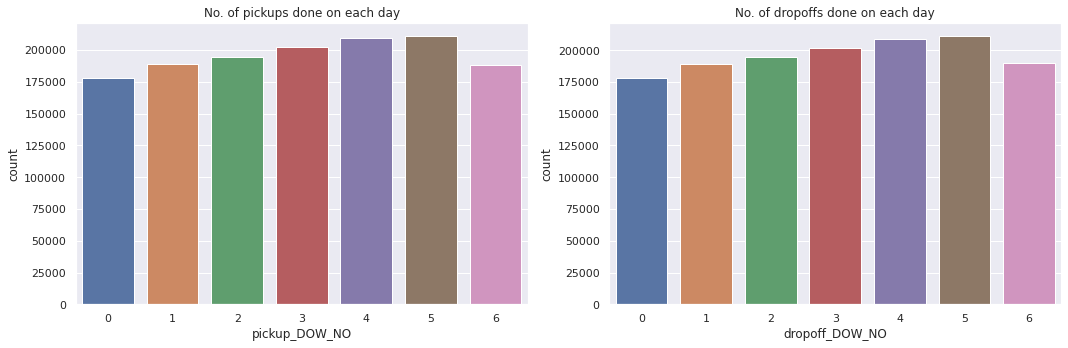

In [181]:
# Distribution of pickups and dropoffs on daily basis
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(x='pickup_DOW_NO', data = wkdf, ax=ax[0])
ax[0].set_title('No. of pickups done on each day')

sns.countplot(x='dropoff_DOW_NO', data = wkdf, ax=ax[1])
ax[1].set_title('No. of dropoffs done on each day')

plt.tight_layout()

* Inference - *Above plots interpret that in a week, "friday", and "saturday" have higher number of pickups and dropoffs.*
* We can see that compared to other days, taxi booking volume is higher on the weekends (4- Friday and 5-Saturday).This suggests that individuals used to go out on weekends for their celebrations, parties, or even other personal work. 

>Vendor

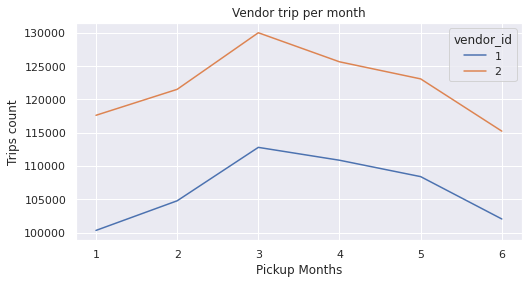

In [182]:
# Monthly trend for each vendor
monthly_pickup_vendor = wkdf.groupby(['pickup_month', 'vendor_id']).size()
monthly_pickup_vendor = monthly_pickup_vendor.unstack()

monthly_pickup_vendor.plot(kind = 'line', figsize = (8,4))
plt.title('Vendor trip per month')
plt.xlabel('Pickup Months')
plt.ylabel('Trips count')

plt.show()

* Inference - We can see that both vendors' trips are at their maximum in the month of March and their lowest in  the month of January, February, and after June.

* We can see here that data provided is only of 6 months

> Pickup and drop timings in hours.

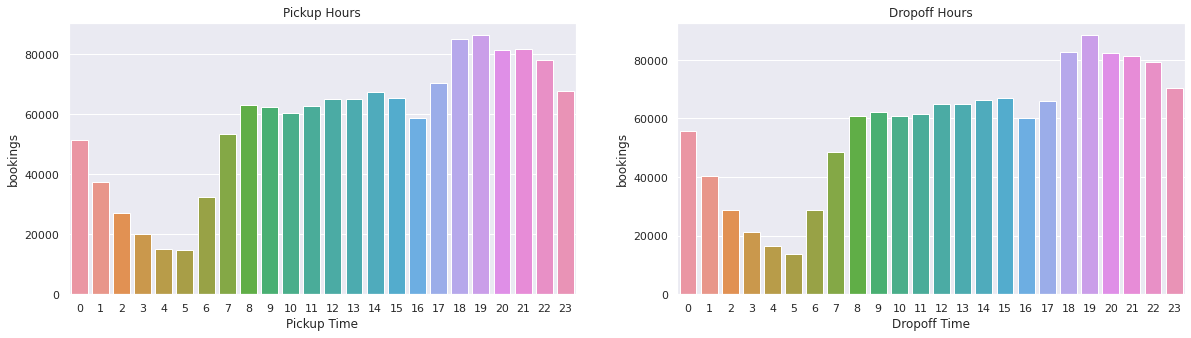

In [183]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
# Pickup data
ax1.set_title('Pickup Hours')
ax = sns.countplot(x = 'pickup_hour', data = wkdf, ax = ax1)
ax.set_xlabel('Pickup Time')
ax.set_ylabel('bookings')

# Dropoff data
ax = sns.countplot(wkdf['dropoff_hour'],ax = ax2)
ax2.set_title('Dropoff Hours')
ax.set_xlabel('Dropoff Time')
ax.set_ylabel('bookings')

plt.show()

* Inference - Distribution of pickup and dropoff hours follows same pattern, it shows that most of the pickups and dropoffs are in the evening( x axis represesnts time in hrs, and peak is >15hr). We can see that people often use taxi services to get to their workplaces in the mornings after 10:00. Additionally, the demand for taxis tends to surge in the late evening after six o'clock.

> Passenger counts

Text(0.5, 1.0, 'Distribution of passenger count')

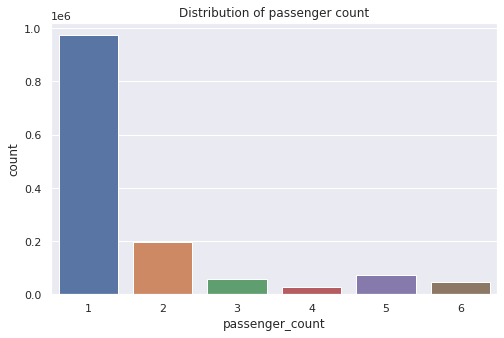

In [184]:
# Distribution of passenger count
plt.figure(figsize=(8,5))
ax=sns.countplot(x=wkdf['passenger_count'])
plt.title('Distribution of passenger count')

* Inference - We can notice that most of the bookings are made by solo travelers, which means less number of people prefer car pool or amy be less number of groups book car...people prefer to ride solo

* There were entries of 0 passenger and very few counts in 7, 8 & 9 passengers, which were removed in outliers studies

>Vendor

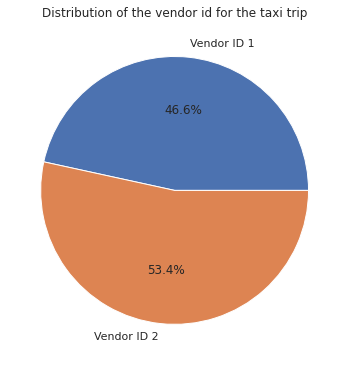

In [185]:
# Distribution of the vendor id for the taxi trip
(wkdf['vendor_id'].value_counts() / wkdf['vendor_id'].count()) * 100

# Percentage For Vendor_id Column
v1_pctg = abs(len(wkdf[wkdf['vendor_id'] == 1])/len(wkdf)*100)
v2_pctg = abs(len(wkdf[wkdf['vendor_id'] == 2])/len(wkdf)*100)
total_pctg = [v1_pctg, v2_pctg]

# Creating a pie chart
plt.figure(figsize = (6,8))
plt.pie(total_pctg, labels = ['Vendor ID 1','Vendor ID 2'], autopct = '%.1f%%')
plt.title('Distribution of the vendor id for the taxi trip')
plt.show()

> Trip duration vs distance

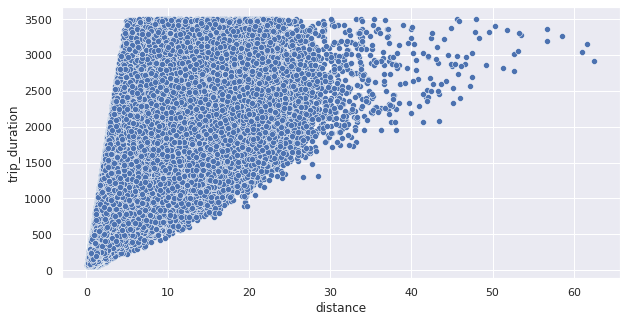

In [186]:
fig = plt.figure(figsize=(10, 5))
sns.scatterplot(x='distance',y='trip_duration',data=wkdf)

* Inference :- As we can se that Duration increases with time, which is obvious direct relation, but as we can observe more time is also nedeed for less distance this might be due to because NY is a busy town, traffic may vary from time to time.

> Visual Summary of EDA:- Histogram vs Boxplot of all imp features.

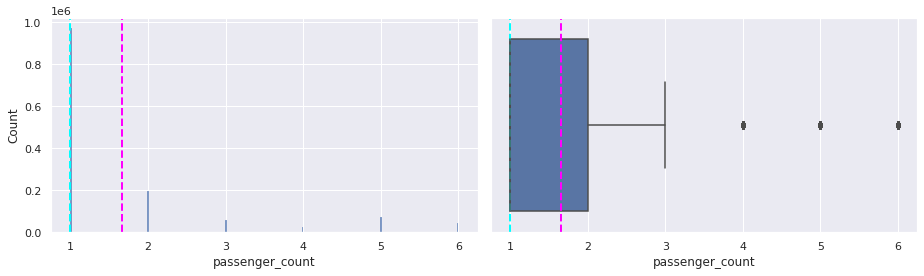

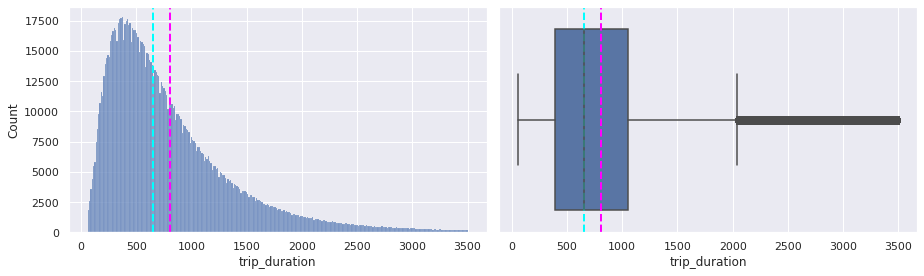

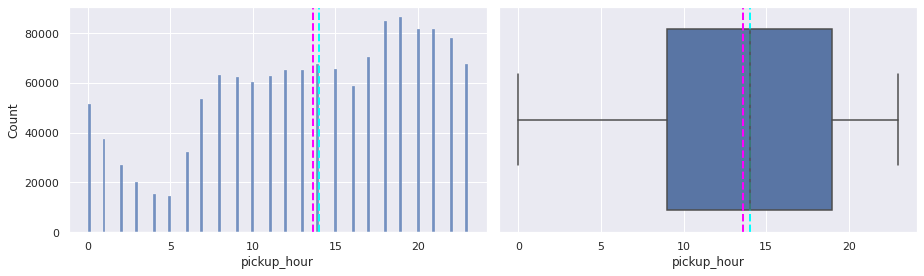

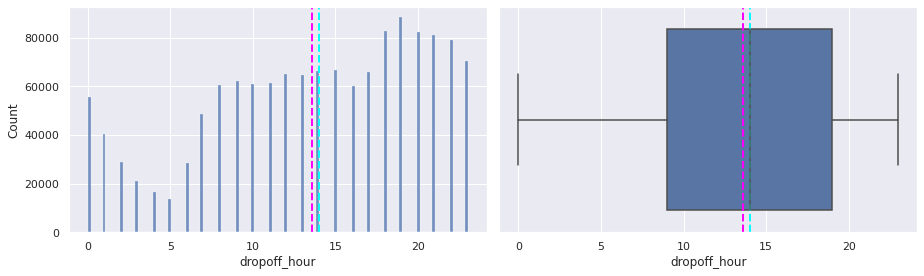

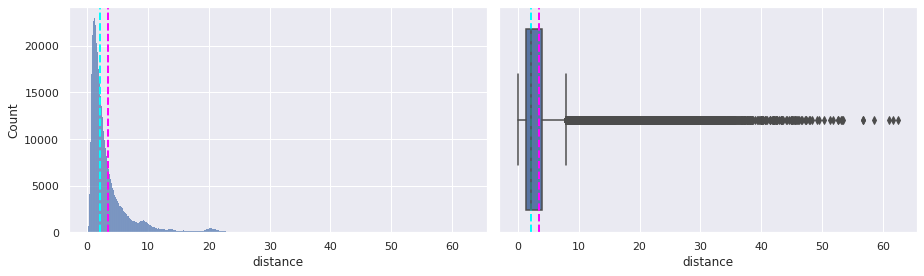

In [187]:
numeric_features = ['passenger_count', 'trip_duration', 'pickup_hour', 'dropoff_hour','distance']
numeric_features

for col in numeric_features:
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,4))
  sns.histplot(data=wkdf, x=col, ax=ax[0])
  ax[0].axvline(wkdf[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[0].axvline(wkdf[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  sns.boxplot(data=wkdf, x=col, ax=ax[1])
  ax[1].axvline(wkdf[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[1].axvline(wkdf[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.tight_layout()

* We can observe the distribution of all imp features above.

### Removing unwanted features.

In [188]:
# dropping off Date columns as information is extracted from it and it is in object form and will interfere in Regression
wkdf.drop(['pickup_date', 'dropoff_date'], axis = 1, inplace = True)

# its in date time format, interferes in regression
wkdf.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1, inplace = True)

# dropping off some not required columns 
wkdf.drop(['id', 'dropoff_year','pickup_year'], axis = 1, inplace = True)


# dropping ALL LATITUDE AND LONGITUDE  columns as we already extracted distance from it and to avoid model complexity
wkdf.drop(['pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude' ], axis = 1, inplace = True)

## Step 6 :- Multicolinearity studies with VIF (Variance inflation factor)

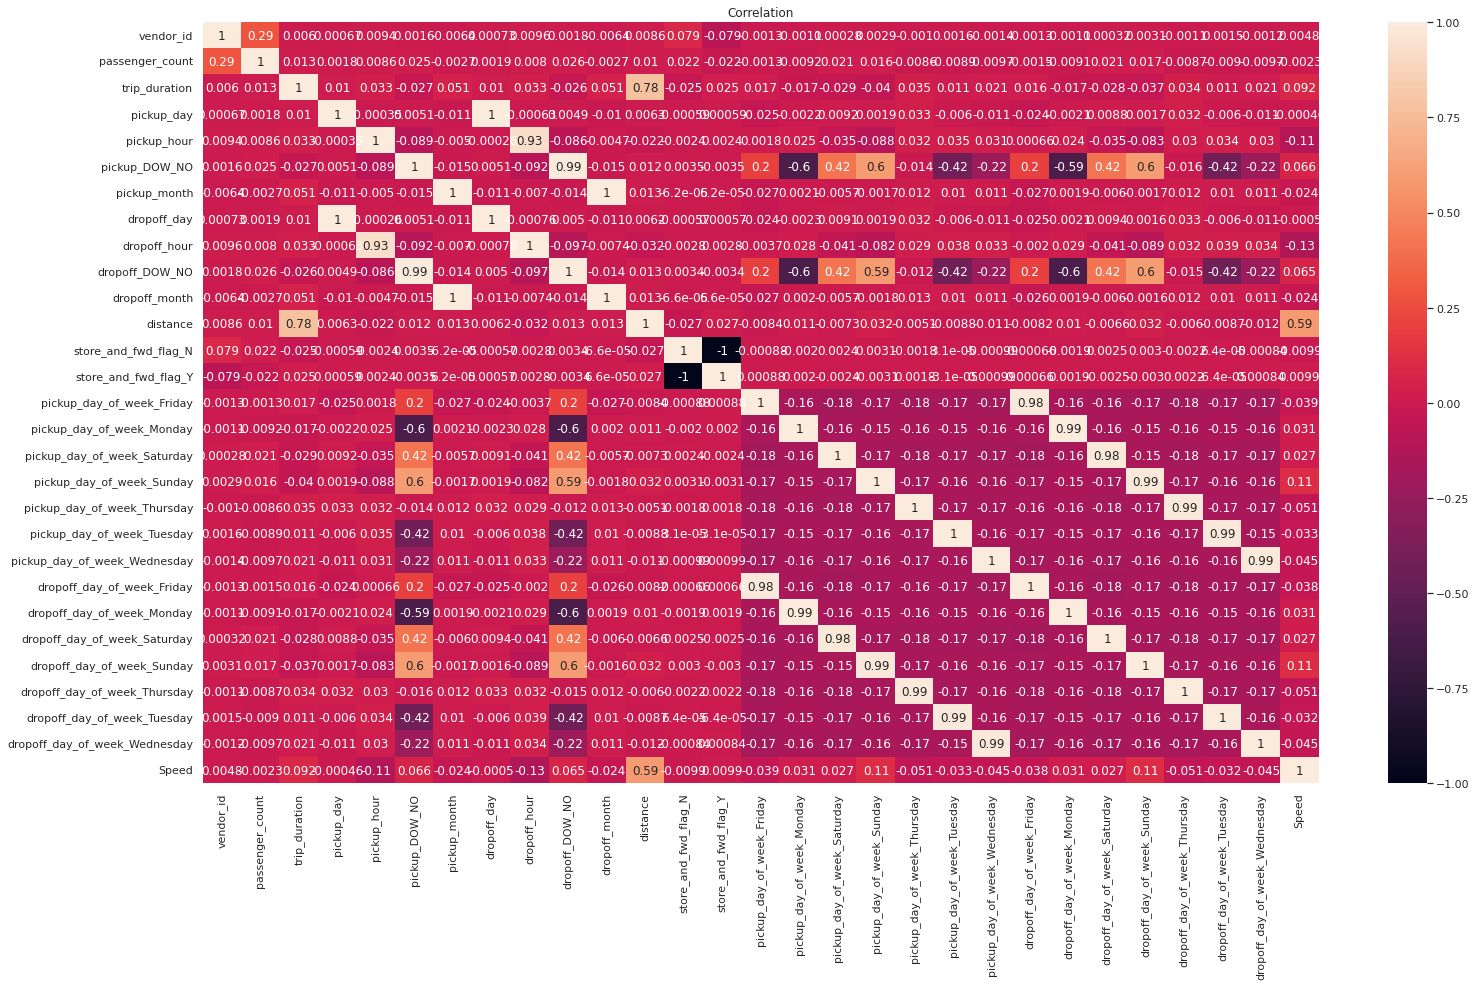

In [189]:
# Checking Correlation in DF

plt.figure(figsize=(25,14))
correlation = wkdf.corr()
sns.heatmap(correlation, annot=True, annot_kws={"size":12})
plt.title("Correlation")
plt.show()

In [190]:
# This function returns highly correlated columns w.r.t given threshold
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [191]:
# Calling the finction with threshold value 0.90

high_corr_features = correlation(wkdf, 0.90)
print('Number of correlated features :',len(set(high_corr_features))) # getting the number of correlated features

Number of correlated features : 12


In [192]:
high_corr_features

{'dropoff_DOW_NO',
 'dropoff_day',
 'dropoff_day_of_week_Friday',
 'dropoff_day_of_week_Monday',
 'dropoff_day_of_week_Saturday',
 'dropoff_day_of_week_Sunday',
 'dropoff_day_of_week_Thursday',
 'dropoff_day_of_week_Tuesday',
 'dropoff_day_of_week_Wednesday',
 'dropoff_hour',
 'dropoff_month',
 'store_and_fwd_flag_Y'}

> We will check vif_score first then drop this columns.

### Variance inflation factor studies (vif)

In [193]:
# Before VIF
wkdf.columns

Index(['vendor_id', 'passenger_count', 'trip_duration', 'pickup_day',
       'pickup_hour', 'pickup_DOW_NO', 'pickup_month', 'dropoff_day',
       'dropoff_hour', 'dropoff_DOW_NO', 'dropoff_month', 'distance',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'pickup_day_of_week_Friday', 'pickup_day_of_week_Monday',
       'pickup_day_of_week_Saturday', 'pickup_day_of_week_Sunday',
       'pickup_day_of_week_Thursday', 'pickup_day_of_week_Tuesday',
       'pickup_day_of_week_Wednesday', 'dropoff_day_of_week_Friday',
       'dropoff_day_of_week_Monday', 'dropoff_day_of_week_Saturday',
       'dropoff_day_of_week_Sunday', 'dropoff_day_of_week_Thursday',
       'dropoff_day_of_week_Tuesday', 'dropoff_day_of_week_Wednesday',
       'Speed'],
      dtype='object')

In [194]:
# import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [195]:
# vif studies
# independent variables list
X = wkdf[['passenger_count', 'pickup_day',
       'pickup_hour', 'pickup_month', 'distance',
       'Speed']]


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#calculating  VIF for each other
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]

print(vif_data)



           feature       VIF
0  passenger_count  2.400506
1       pickup_day  3.494981
2      pickup_hour  3.971225
3     pickup_month  4.087979
4         distance  2.806363
5            Speed  5.930820


>  Based on Vif score of columns, columns were dropped one by one. all the columns above VIF score 6 are dropped ______ ( according to ResearchGate)


In [196]:
wkdf = wkdf[['passenger_count', 'pickup_day',
       'pickup_hour', 'pickup_month', 'distance',
       'Speed','trip_duration']]                       # 'trip_duration' is dependent feature

In [197]:
# After VIF
wkdf.columns

Index(['passenger_count', 'pickup_day', 'pickup_hour', 'pickup_month',
       'distance', 'Speed', 'trip_duration'],
      dtype='object')

In [198]:
wkdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372373 entries, 0 to 1458643
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   passenger_count  1372373 non-null  int64  
 1   pickup_day       1372373 non-null  int64  
 2   pickup_hour      1372373 non-null  int64  
 3   pickup_month     1372373 non-null  int64  
 4   distance         1372373 non-null  float64
 5   Speed            1372373 non-null  float64
 6   trip_duration    1372373 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 116.0 MB


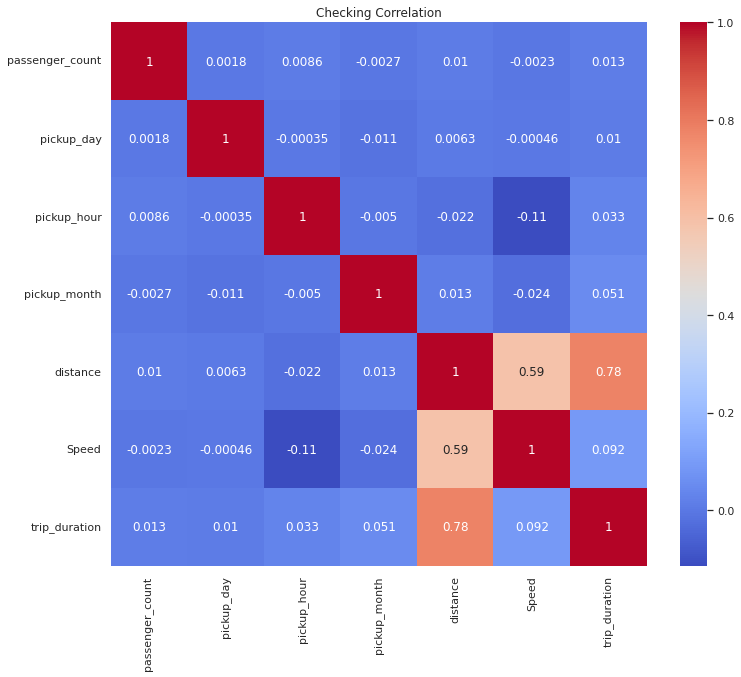

In [199]:
# Checking Correlation

plt.figure(figsize=(12,10))

cor4 = wkdf.corr() # getting correlation using corr() function

sns.heatmap(cor4, annot=True, cmap='coolwarm' , annot_kws={"size":12})

plt.title("Checking Correlation")
plt.show()

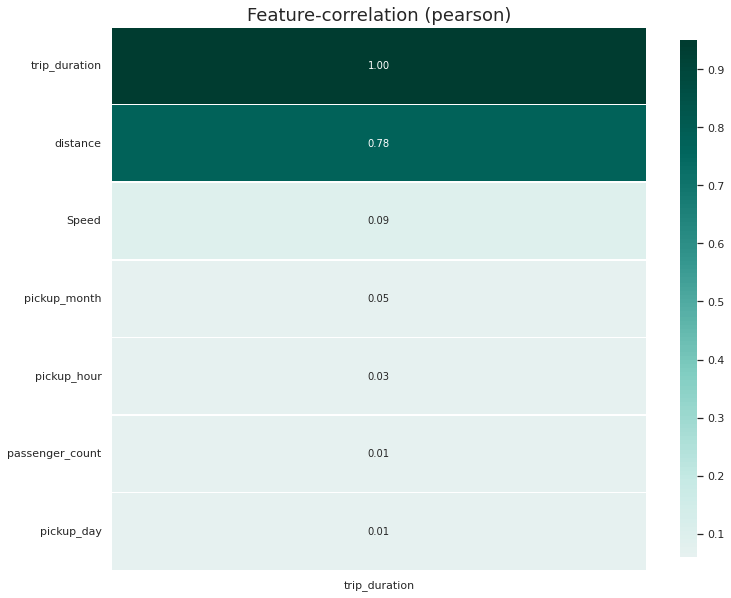

In [200]:
#correlation graph dependent and independent features
klib.corr_plot(wkdf, target=wkdf['trip_duration'])


* We can see that distance is affecting duration follwed by speed.

> Correlation studies and processing done

## Step 7:- Supervised Machine Learning of NYC taxi trip time.

### Seperating dependent (y) and independent(x) data/columns. 

In [201]:
# Making of DataFrame for ML 
model_df= wkdf.copy()  

In [202]:
model_df.columns

Index(['passenger_count', 'pickup_day', 'pickup_hour', 'pickup_month',
       'distance', 'Speed', 'trip_duration'],
      dtype='object')

In [203]:
# seperating our data in feature and target varibles
x = model_df.drop(['trip_duration'], axis = 1)

# taking our target variable into log form 
# as we saw in previous analysis that using log form trip_duration column is showing normal distribution

y = np.log(model_df['trip_duration']).values

>Spliting data

In [204]:
from sklearn.model_selection import train_test_split 

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 70% train and 30 % test


In [206]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape # check shape


((960661, 6), (411712, 6), (960661,), (411712,))

* Importing libraries for ML from `sklearn`

In [207]:
# importing Linear regression from sklearn
from sklearn.linear_model import LinearRegression

# importing various matrics that well help us to analyze our regression model

from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

# importing decision tree regressor from sklearn

from sklearn.tree import DecisionTreeRegressor

# importing GridSearchCv
from sklearn.model_selection import GridSearchCV

# importing randon forest regressor from sklearn

from sklearn.ensemble import RandomForestRegressor

# Importing XGBOOST

import xgboost

# importing metrics
from sklearn import metrics

# importing ridge regression
from sklearn.linear_model import Ridge

# importing lasso regression 
from sklearn.linear_model import Lasso

# importing elastic net regression
from sklearn.linear_model import ElasticNet

#importing GradientBoost
from sklearn.ensemble import GradientBoostingRegressor

>Build & Test new model function 

In [208]:
# Final list of models

models = [LinearRegression, Lasso, Ridge, ElasticNet, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, xgboost]

# function that will fit our models and train our models
def run_ml_models(models):
    scores = []
    
    for i in models:
        
        if i == LinearRegression:
            
            # Creating instance for our model
            model = LinearRegression()
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            # taking prediction from our model using .predict function
            print('Prediction by LinearRegression :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model, model.predict(x_test)))        
        
    
        elif i == DecisionTreeRegressor:
            # Maximum depth of trees
            max_depth = [4,6,8,10]

            # Minimum number of samples required to split a node
            min_samples_split = [10,20,30]

            # Minimum number of samples required at each leaf node
            min_samples_leaf = [10,16,20]

            # Hyperparameter Grid
            param_decision_tree = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
            
            # Creating instance for our model
            decision_tree_model = DecisionTreeRegressor()
            # Grid search
            model = GridSearchCV(estimator=decision_tree_model,
                       param_grid = param_decision_tree,
                       cv = 5, verbose=2, scoring='r2')
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)

            # taking prediction from our model using .predict function
            print('\nPrediction by DecisionTreeRegressor :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test))) 

        elif i == Ridge:
          
            # Creating instance for our model
            model = Ridge()
          
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
          
            # taking prediction from our model using .predict function
            print('\nPrediction by Ridge regression :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test)))
            
            
        elif i == RandomForestRegressor:
            
             # Creating instance for our model
            model = RandomForestRegressor(criterion = 'mse', n_estimators = 10 ,
                                              max_depth = 10)
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            # taking prediction from our model using .predict function
            print('\nPrediction by RandomForestRegressor :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test)))
        
        elif i == xgboost:
          
            # Number of trees
            total_estimators = [50,100,120]

            # Maximum depth of trees
            max_depth_of_trees = [5,7,9]
            min_samples_split = [40,50]
            #learning_rate=[0.1,0.3,0.5]

            # Hyperparameter Grid
            param_xgboost = {'total_estimators' : total_estimators,
                              'max_depth' : max_depth_of_trees,
                            'min_samples_split':min_samples_split
                             }

            # Creating instance for our model
            xgboost_model = xgboost.XGBRegressor()

            # Grid search
            model = GridSearchCV(estimator=xgboost_model,param_grid = param_xgboost,cv = 3, verbose=2,scoring="r2")

          
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
          
            # taking prediction from our model using .predict function
            print('\nPrediction by Xgboost :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test)))

        elif i == Lasso:
          
            # Creating instance for our model
            model = Lasso(alpha=1.0)
          
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
          
            # taking prediction from our model using .predict function
            print('\nPrediction by Lasso :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test)))

        elif i == ElasticNet:
          
            # Creating instance for our model
            model = ElasticNet(alpha=1.0, l1_ratio=0.5)
          
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
          
            # taking prediction from our model using .predict function
            print('\nPrediction by ElasticNet :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test)))

        elif i == GradientBoostingRegressor:
          
            # Creating instance for our model
            model = GradientBoostingRegressor()
          
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
          
            # taking prediction from our model using .predict function
            print('\nPrediction by GradientBoostingRegressor :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test)))

       
    
     
    #printing all the scores for each model
    result = pd.concat(scores).reset_index(drop = True)
    return result.set_index(pd.Series(['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet', 'DecisionTree Regressor', 'RandomForest Regressor', 'GradientBoosting Regressor', 'XGBoost']))

> Functions to be used in "run_ml_models" function, defined above.

In [209]:
# Function that will calculate the accuracy, r2 and RMSE scores

def model_results(model,y_predicted):
    
    # getting Training Accuracy
    train_scr = model.score(x_train, y_train)
    
    #getting Test Accuracy
    test_scr = model.score(x_test, y_test)
    
    # getting R2 score
    r2_scr = r2_score(y_test, y_predicted)

    #Getting Adjusted R2 score
    p = x.shape[1]
    n = y_test.shape[0]
    a = (1 - r2_scr)
    b = (n - 1) / (n - p - 1)
    adj_r2_scr = (1 - (a * b))
    
    #getting mse
    mse = mean_squared_error(y_test,y_predicted)

    # getting RMSE
    rmse = np.sqrt(mse)
        
    matrics_name = ['Training_Score', 'Testing_Score', 'R2_Score', 'ADJ_R2', 'MSE', 'RMSE']
    matrics_value = [train_scr, test_scr, r2_scr, adj_r2_scr, mse, rmse]
    
    total_matrics = dict(zip(matrics_name,matrics_value))

    df = pd.DataFrame(data = [total_matrics])
    return df

In [210]:
# Function to plot the Regression graphs that will show the relation between actual and predicted values

def tr_vs_pred_plot(actual,predicted):

  plt.figure(figsize = (6,3))

  fig, ax = plt.subplots()
  
  # scatter plot between actual and predicted values
  ax.scatter(actual, predicted)

  #getting the line which is our prediction line
  # through min and max of the values
  ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], '--', lw = 3)
  
  ax.set_xlabel('Actual_Values(Time_Duration)')
  
  ax.set_ylabel('Predicted_Values(Time_Duration)')
  
  plt.show()

In [211]:
# Funtion that will plot the R2 score comparision graph

def R2_score_plot(model,results):

  plt.figure(figsize=(6,3))

  # Getting our r2 scores
  r2_data = results['R2_Score']
  
  # ploting r2 values
  r2_data.plot(kind="bar", color ='orange' , legend=False)
  
  plt.title("R2 SCORE COMPARISION PLOT")

  plt.show()

In [212]:
# Funtion that will plot the RMSE score comparision graph

def RMSE_score_plot(model,results):

  plt.figure(figsize=(6,3))

  # Getting our RMSE scores
  mse_data = results['RMSE']
  
  # ploting RMSE values
  mse_data.plot(kind="bar", color ='red', legend=False)
  
  plt.title("RMSE SCORE COMPARISION PLOT")

  plt.show()

In [216]:
# Funtion that will plot the RMSE score comparision graph

def MSE_score_plot(model,results):

  plt.figure(figsize=(6,3))

  # Getting our RMSE scores
  mse_data = results['MSE']
  
  # ploting RMSE values
  mse_data.plot(kind="bar", color ='maroon',  legend=False)
  
  plt.title("MSE SCORE COMPARISION PLOT")

  plt.show()

### A. Running ML models for Unscaled data

Prediction by LinearRegression :
 [5.77184425 6.53385927 6.97751365 ... 6.44818644 6.39183424 6.01715701]


<Figure size 432x216 with 0 Axes>

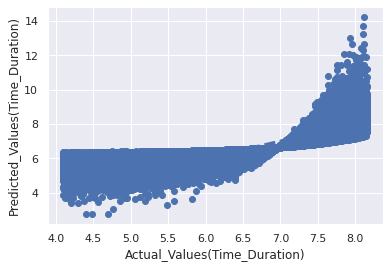


Prediction by Lasso :
 [6.30470775 6.32923179 6.58300776 ... 6.40056035 6.47276154 6.34345995]


<Figure size 432x216 with 0 Axes>

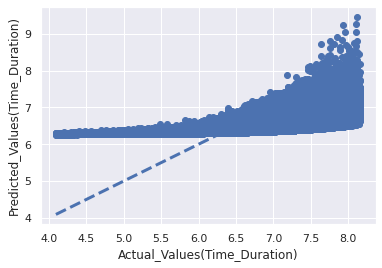


Prediction by Ridge regression :
 [5.77184433 6.53385926 6.97751359 ... 6.44818644 6.39183425 6.01715707]


<Figure size 432x216 with 0 Axes>

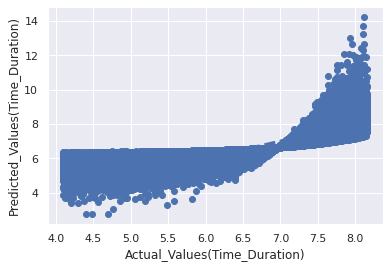


Prediction by ElasticNet :
 [6.06789979 6.4279477  6.75935447 ... 6.42314672 6.44111038 6.20843176]


<Figure size 432x216 with 0 Axes>

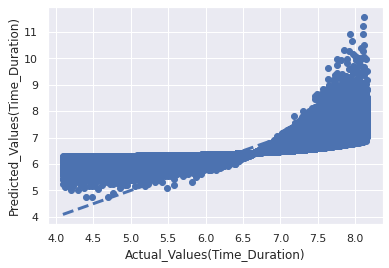

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   1.9s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   1.9s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   1.6s
[CV] END max_d

<Figure size 432x216 with 0 Axes>

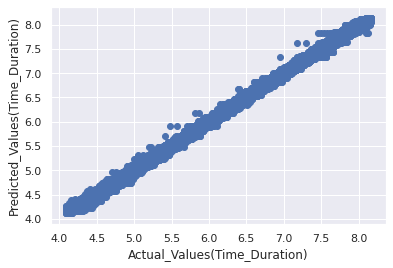


Prediction by RandomForestRegressor :
 [5.10256314 6.69529579 7.3279688  ... 6.6474097  6.69072657 5.88688687]


<Figure size 432x216 with 0 Axes>

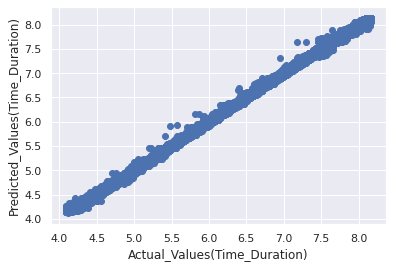


Prediction by GradientBoostingRegressor :
 [5.09415668 6.66784684 7.30755759 ... 6.66480655 6.69756154 5.86545407]


<Figure size 432x216 with 0 Axes>

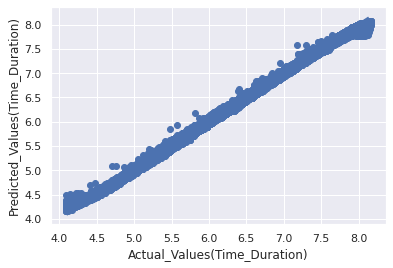

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[01:27:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=  37.0s
[01:27:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=  37.5s
[01:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=  38.2s
[01:28:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=100; total time=  37.2s
[01:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecat

<Figure size 432x216 with 0 Axes>

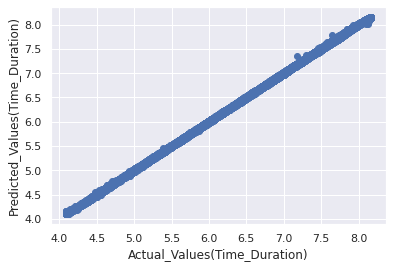

In [217]:
ml_output_unscaled = run_ml_models(models)

In [218]:
ml_output_unscaled

,Training_Score,Testing_Score,R2_Score,ADJ_R2,MSE,RMSE
Linear Regression,0.687631,0.689211,0.689211,0.689207,0.157732,0.397155
Lasso,0.310126,0.309987,0.309987,0.309976,0.350197,0.591774
Ridge,0.687631,0.689211,0.689211,0.689207,0.157732,0.397155
ElasticNet,0.569535,0.570315,0.570315,0.570309,0.218074,0.466984
DecisionTree Regressor,0.997682,0.997566,0.997566,0.997566,0.001235,0.035149
RandomForest Regressor,0.999197,0.999160,0.999160,0.999160,0.000426,0.020650
GradientBoosting Regressor,0.998598,0.998574,0.998574,0.998574,0.000724,0.026899
XGBoost,0.999937,0.999930,0.999930,0.999930,0.000035,0.005948


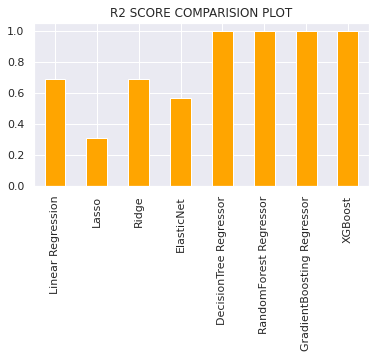

In [219]:
# Using our defined funtion that will plot R2 score bar chart for us.

R2_score_plot(ml_output_unscaled.index, ml_output_unscaled)

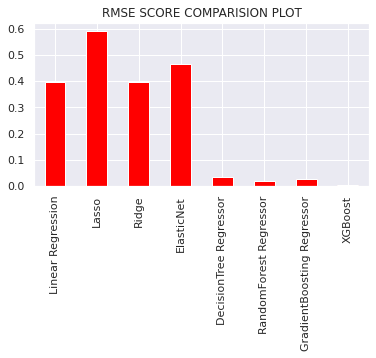

In [220]:
# # Using our defined funtion that will plot RMSE score bar chart for us.

RMSE_score_plot(ml_output_unscaled.index, ml_output_unscaled)

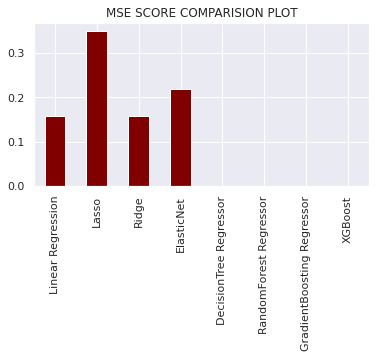

In [221]:
# # Using our defined funtion that will plot MSE score bar chart for us.

MSE_score_plot(ml_output_unscaled.index, ml_output_unscaled)

### B. Running ML models for Scaled data. (StandardScaler)

In [222]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)   # spliting data in train 70% and test 30%


In [223]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape   # checking shape


((960661, 6), (411712, 6), (960661,), (411712,))

In [224]:
# importing standard scaler from sklearn
from sklearn.preprocessing import StandardScaler

In [225]:
# Creating object for our standard scaler
scaler = StandardScaler()

> Fitting and transforming  training data.
> Transfroming testting data.

In [226]:
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

print("Data scaling is complete")

Data scaling is complete


Prediction by LinearRegression :
 [6.49443606 6.35575295 6.65896074 ... 7.56707884 6.93521336 7.02751782]


<Figure size 432x216 with 0 Axes>

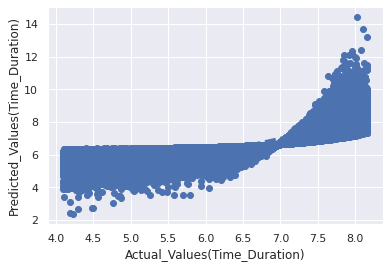


Prediction by Lasso :
 [6.45328413 6.45328413 6.45328413 ... 6.45328413 6.45328413 6.45328413]


<Figure size 432x216 with 0 Axes>

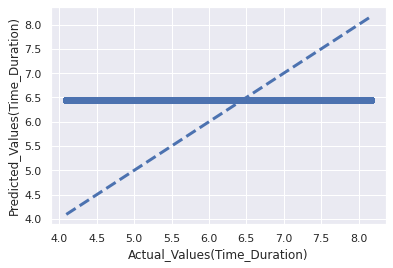


Prediction by Ridge regression :
 [6.49443545 6.35575245 6.65895985 ... 7.56707619 6.93521184 7.02751648]


<Figure size 432x216 with 0 Axes>

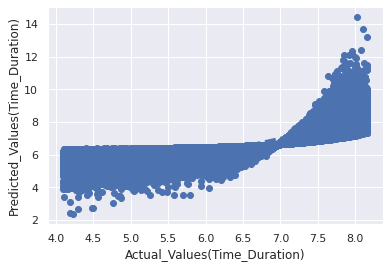


Prediction by ElasticNet :
 [6.45328413 6.45328413 6.45328413 ... 6.45328413 6.45328413 6.45328413]


<Figure size 432x216 with 0 Axes>

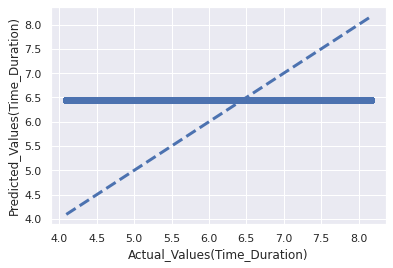

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   1.7s
[CV] END max_d

<Figure size 432x216 with 0 Axes>

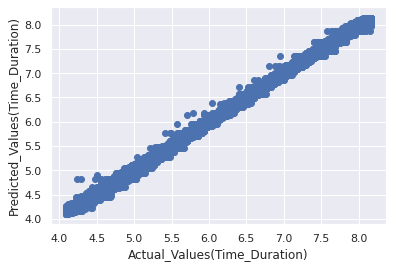


Prediction by RandomForestRegressor :
 [6.70893778 6.07736356 7.02291149 ... 7.73132218 7.48538108 7.32385762]


<Figure size 432x216 with 0 Axes>

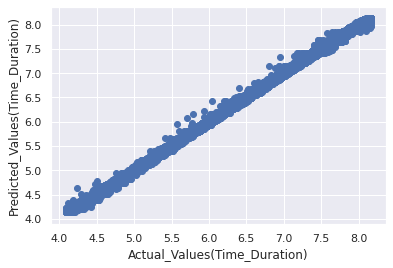


Prediction by GradientBoostingRegressor :
 [6.70395486 6.09027326 6.9980895  ... 7.72639884 7.48077719 7.36660267]


<Figure size 432x216 with 0 Axes>

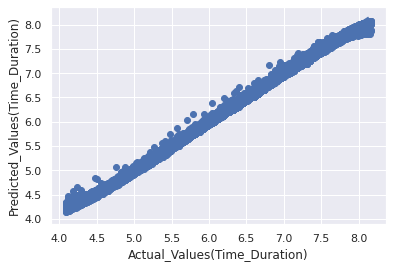

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[02:28:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=  34.8s
[02:28:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=  34.8s
[02:29:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=  34.6s
[02:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=100; total time=  36.1s
[02:30:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecat

<Figure size 432x216 with 0 Axes>

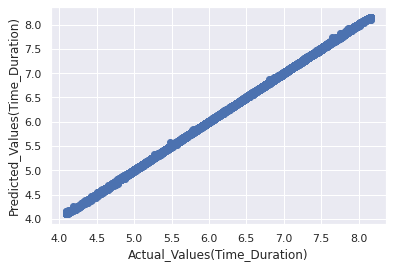

In [227]:
ml_output_scaled = run_ml_models(models)

In [228]:
ml_output_scaled

,Training_Score,Testing_Score,R2_Score,ADJ_R2,MSE,RMSE
Linear Regression,0.688359,0.687509,0.687509,0.687504,0.158592,0.398236
Lasso,0.000000,-0.000002,-0.000002,-0.000016,0.507510,0.712397
Ridge,0.688359,0.687509,0.687509,0.687504,0.158592,0.398236
ElasticNet,0.000000,-0.000002,-0.000002,-0.000016,0.507510,0.712397
DecisionTree Regressor,0.997681,0.997569,0.997569,0.997569,0.001234,0.035122
RandomForest Regressor,0.999181,0.999142,0.999142,0.999142,0.000436,0.020871
GradientBoosting Regressor,0.998679,0.998660,0.998660,0.998660,0.000680,0.026077
XGBoost,0.999939,0.999933,0.999933,0.999933,0.000034,0.005852


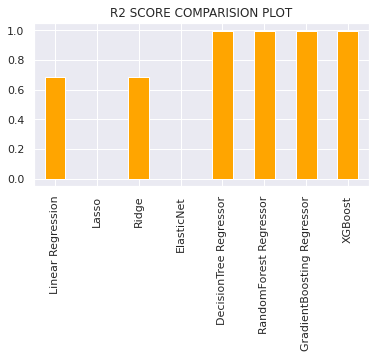

In [229]:
# Using our defined funtion that will plot R2 score bar chart for us.

R2_score_plot(ml_output_scaled.index, ml_output_scaled)

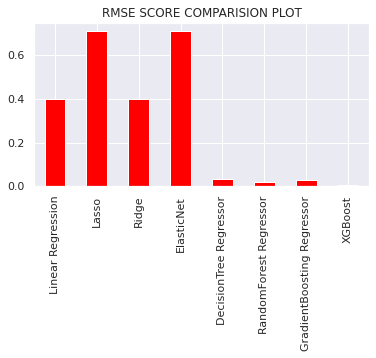

In [230]:
# # Using our defined funtion that will plot RMSE score bar chart for us.

RMSE_score_plot(ml_output_scaled.index, ml_output_scaled)

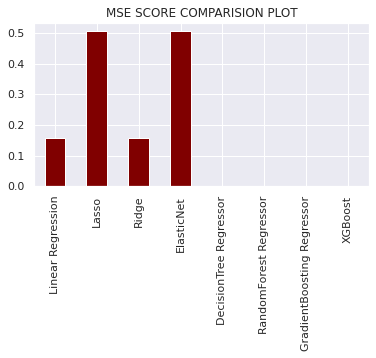

In [231]:
# # Using our defined funtion that will plot MSE score bar chart for us.

MSE_score_plot(ml_output_scaled.index, ml_output_scaled)

# Conclusion and Summary of studies

* As we can see, there are eight supervised machine learning models in total: Linear regression, Lasso regression, Ridge regression, ElasticNet regression, DecisionTree, RandomForest, GradientBoost, and XGboost (in the same order). All four models, DecisionTree, RandomForest, GradientBoost, and XGboost, provided the best R2 score and adjusted R2 score, all of which were close to 0.999. both unscaled and scaled data in the scenarios.
After scaling, the accuracy of linear regression further declines, and Lasso and ElasticNet stops producing valid results.

* But after evaluation XGBoost was having least MSE and RMSE error. Thus, becomes the best model for prediction of time required for taxi trip in NYC city.
   * Exact scores of XGBoost:
     * R2 score: Before Scaling:- 0.999930 	   & After Scaling:- 0.999933	
     * Adjusted R2 score: Before Scaling:- 0.999930        & After Scaling:- 0.999933	
     * Root mean square error (RMSE): Before Scaling:- 0.005948        & After Scaling:- 0.005852
     * Mean Square error (MSE):Before Scaling:- 0.000035        & After Scaling:- 0.000034
   * Very precise. *(Takes arround 1 hr to run)*
* As we can see from the data that the EDA dependent variable (trip duration) was highly related to factors like distance, speed, and pickup hours, in the real world scenario we might need more information like "Current Traffic Status" to forecast the needed time more precisely.

>Overall, the experience was positive and was quite helpful in solidifying our understanding of supervised ML-regression. ML Model Building, hyperparameter adjustment, etc. were all done with excellent hands-on expertise. In conclusion, it was a highly interesting endeavour that offered a variety of experiences. *Thank You for this crucial experience...!!!*
